# Heart Disease Prediction
Mengyang He and Milo Yen-Goossens

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('./cardio_train.csv',sep=";")
df = pd.DataFrame(data)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
df.drop(columns=['id'],inplace=True)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [4]:
# check if the dataset has null or missing value
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [46]:
# add bmi feature
bmi = df['weight'].div(df['height'].multiply(df['height'])) * 100
df['bmi'] = bmi

In [52]:
df_normalized = df.copy()
for var in ['age', 'height', 'weight', 'ap_hi', 'ap_lo']:
  print(var + " mean, avg: " + str(df[var].mean()) + ", " + str(df[var].std()))
  df_normalized[var] = df[var] - df[var].mean()
  df_normalized[var] = df_normalized[var].div(df[var].std())

df_normalized

age mean, avg: 19468.865814285713, 2467.251667241401
height mean, avg: 164.35922857142856, 8.210126364538038
weight mean, avg: 74.20569, 14.39575667851138
ap_hi mean, avg: 128.8172857142857, 154.01141945609137
ap_lo mean, avg: 96.63041428571428, 188.47253029639026


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,-0.436058,2,0.443449,-0.847867,-0.122181,-0.088238,1,1,0,0,1,0,0.219671
1,0.307684,1,-1.018161,0.749826,0.072610,-0.035180,3,1,0,0,1,1,0.349277
2,-0.247995,1,0.078046,-0.708937,0.007679,-0.141296,3,1,0,0,0,1,0.235078
3,-0.748147,2,0.565250,0.541431,0.137540,0.017878,1,1,0,0,1,1,0.287105
4,-0.808538,1,-1.018161,-1.264657,-0.187111,-0.194354,1,1,0,0,0,0,0.230112
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,-0.092761,2,0.443449,0.124642,-0.057251,-0.088238,1,1,1,0,1,0,0.269274
69996,1.269483,1,-0.774559,3.597887,0.072610,-0.035180,2,2,0,0,1,1,0.504727
69997,-0.163285,2,2.270461,2.139124,0.332331,-0.035180,3,1,0,1,0,1,0.313536
69998,1.200580,1,-0.165555,-0.153218,0.040145,-0.088238,1,2,0,0,0,1,0.270993


In [89]:
# K-NN - data setup

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

neighbors = range(50, 121, 5)
knn_scores = [0] * len(neighbors)
folds = 5

knn_X = df_normalized.drop(columns=['cardio', 'height', 'weight', 'gender', 'alco', 'gluc', 'active', 'smoke'])
knn_y = df_normalized['cardio'].values

knn_X_train, knn_X_test, knn_y_train, knn_y_test = train_test_split(knn_X, knn_y, test_size=0.2, random_state=1, stratify=knn_y)

Best-performing k value: 80, accuracy: 0.7336428571428572


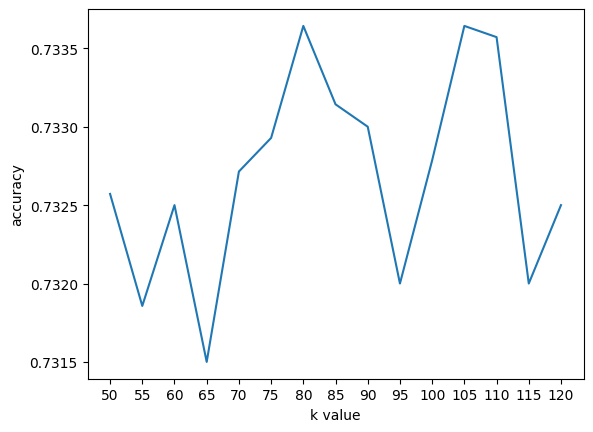

In [90]:
# train K-NN model - this block should take ~1.5 minutes

for i in range(len(neighbors)):
  knn = KNeighborsClassifier(n_neighbors = neighbors[i])
  
  knn.fit(knn_X_train, knn_y_train)
  knn_scores[i] = knn.score(knn_X_test, knn_y_test)

  # CODE FOR K-FOLD CV (takes too long to run):
  # score = cross_val_score(knn, knn_X, knn_y, cv=folds)
  # scores[i] = np.mean(score)

bestK = knn_scores.index(max(knn_scores))
print(f'Best-performing k value: {neighbors[bestK]}, accuracy: {knn_scores[bestK]}')

plt.xlabel('k value')
plt.ylabel('accuracy')
plt.plot(knn_scores)
plt.xticks(range(len(neighbors)), neighbors)
plt.show()